# **603 PROJECT WORK**

In [1]:
%%capture

# import the jupyter notebook importer
import import_ipynb
from data603 import SparkLauncher
from data603 import HDFSLauncher

conf = SparkLauncher.get_spark_conf()
#spark = SparkLauncher.get_spark_session(conf, pack_venv = False)
hdfs = HDFSLauncher.get_hdfs()

In [2]:
spark = SparkLauncher.get_spark_session(conf , pack_venv = False)

Creating Spark Session: fk39216_data603_spark_20221211_131937


In [3]:
hdfs.mkdir("/data/projects/fall_2022/fk39216/motorvehiclescollision")

In [4]:
hdfs.ls("/data/projects/fall_2022/fk39216/motorvehiclescollision/Motor_Vehicle_Collisions_-_Crashes.csv")

## Ingesting data into HDFS

In [5]:
import boto3

In [6]:
with open("/scratch/data603_fa2022/fk39216/project/Motor_Vehicle_Collisions_-_Crashes (1).csv", 'rb') as fid:
    hdfs.upload("/data/projects/fall_2022/fk39216/motorvehiclescollision/Motor_Vehicle_Collisions_-_Crashes.csv", fid)

In [7]:
collisions_df = spark.read.csv('/data/projects/fall_2022/fk39216/motorvehiclescollision/Motor_Vehicle_Collisions_-_Crashes.csv', header = True, inferSchema =True)

## Partitioning the data

In [8]:
collisions_df.rdd.getNumPartitions()

16

In [9]:
collisions_df = collisions_df.repartition(200)

In [10]:
collisions_df.rdd.getNumPartitions()

200

In [11]:
collisions_df.limit(5).toPandas()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/14/2021,22:49,BROOKLYN,11207,40.658220,-73.891460,"(40.65822, -73.89146)",LINDEN BOULEVARD,SHEFFIELD AVENUE,None,...,Driver Inattention/Distraction,None,None,None,4477331,Taxi,None,None,None,None
1,12/06/2021,12:18,MANHATTAN,10013,40.721350,-74.004650,"(40.72135, -74.00465)",CANAL STREET,WEST BROADWAY,None,...,Unspecified,None,None,None,4484549,Sedan,Sedan,None,None,None
2,08/19/2021,13:15,None,None,40.605427,-74.076200,"(40.605427, -74.0762)",HYLAN BOULEVARD,NARROWS ROAD SOUTH,None,...,Unspecified,None,None,None,4448790,Sedan,Station Wagon/Sport Utility Vehicle,None,None,None
3,01/11/2022,7:15,BROOKLYN,11219,40.628643,-74.005936,"(40.628643, -74.005936)",65 STREET,11 AVENUE,None,...,Unspecified,None,None,None,4493669,Station Wagon/Sport Utility Vehicle,None,None,None,None
4,07/13/2022,0:13,BROOKLYN,11217,40.680817,-73.974880,"(40.680817, -73.97488)",None,None,473 BERGEN STREET,...,Unspecified,None,None,None,4545734,Box Truck,Bus,None,None,None


In [ ]:
collisions_df=collisions_df.drop('CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5')

Dropping some columns as it has mostly null values

In [13]:
collisions_df.limit(10).toPandas()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,09/16/2021,14:30,BROOKLYN,11214,40.589220,-73.986720,"(40.58922, -73.98672)",HARWAY AVENUE,BAY 47 STREET,None,...,0,0,0,2,0,Failure to Yield Right-of-Way,Unspecified,4458660,Station Wagon/Sport Utility Vehicle,Sedan
1,11/07/2021,19:18,MANHATTAN,10019,NaN,NaN,None,None,None,135 WEST 52 STREET,...,0,0,0,0,0,Unspecified,None,4475473,Taxi,None
2,10/07/2021,9:50,BROOKLYN,11223,40.609253,-73.969050,"(40.609253, -73.96905)",AVENUE P,EAST 5 STREET,None,...,0,0,0,1,0,Unspecified,Unspecified,4465147,Sedan,Station Wagon/Sport Utility Vehicle
3,09/20/2021,13:48,None,None,40.630486,-74.145950,"(40.630486, -74.14595)",MARTIN LUTHER KING JR,None,None,...,0,0,0,1,0,Driver Inattention/Distraction,Driver Inattention/Distraction,4459508,Taxi,Station Wagon/Sport Utility Vehicle
4,02/17/2022,8:02,QUEENS,11372,40.749090,-73.890650,"(40.74909, -73.89065)",None,None,75-07 37 AVENUE,...,0,0,0,0,0,Turning Improperly,Unspecified,4505068,Box Truck,Station Wagon/Sport Utility Vehicle
5,06/05/2022,14:30,None,None,40.764490,-73.930374,"(40.76449, -73.930374)",BROADWAY,None,None,...,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,4534856,Sedan,Station Wagon/Sport Utility Vehicle
6,12/31/2021,14:50,QUEENS,11378,40.718555,-73.915180,"(40.718555, -73.91518)",54 STREET,GRAND AVENUE,None,...,0,0,0,2,0,Oversized Vehicle,Unspecified,4492412,Dump,Station Wagon/Sport Utility Vehicle
7,09/09/2021,9:55,None,None,40.840496,-73.945990,"(40.840496, -73.94599)",HENRY HUDSON PARKWAY,None,None,...,0,0,0,3,0,Unsafe Lane Changing,Unspecified,4455584,Sedan,Sedan
8,07/10/2022,15:31,QUEENS,11358,40.755670,-73.803680,"(40.75567, -73.80368)",None,None,45-15 163 STREET,...,0,0,0,0,0,Backing Unsafely,Unspecified,4545110,Sedan,Sedan
9,07/03/2021,6:20,BRONX,10474,40.807250,-73.879720,"(40.80725, -73.87972)",None,None,298 HALLECK STREET,...,0,0,0,0,0,Unsafe Speed,Unspecified,4433920,Sedan,Sedan


## Schema

In [14]:
from pyspark.sql.types import IntegerType, FloatType, DateType, TimestampType, StringType

In [15]:
collisions_df = collisions_df.withColumn('NUMBER OF MOTORIST INJURED', collisions_df['NUMBER OF MOTORIST INJURED'].cast(IntegerType()))
collisions_df = collisions_df.withColumn('NUMBER OF CYCLIST KILLED', collisions_df['NUMBER OF CYCLIST KILLED'].cast(IntegerType()))
collisions_df = collisions_df.withColumn('NUMBER OF PERSONS INJURED', collisions_df['NUMBER OF PERSONS INJURED'].cast(IntegerType()))

In [16]:
collisions_df.printSchema()

root
 |-- CRASH DATE: string (nullable = true)
 |-- CRASH TIME: string (nullable = true)
 |-- BOROUGH: string (nullable = true)
 |-- ZIP CODE: string (nullable = true)
 |-- LATITUDE: double (nullable = true)
 |-- LONGITUDE: double (nullable = true)
 |-- LOCATION: string (nullable = true)
 |-- ON STREET NAME: string (nullable = true)
 |-- CROSS STREET NAME: string (nullable = true)
 |-- OFF STREET NAME: string (nullable = true)
 |-- NUMBER OF PERSONS INJURED: integer (nullable = true)
 |-- NUMBER OF PERSONS KILLED: integer (nullable = true)
 |-- NUMBER OF PEDESTRIANS INJURED: integer (nullable = true)
 |-- NUMBER OF PEDESTRIANS KILLED: integer (nullable = true)
 |-- NUMBER OF CYCLIST INJURED: integer (nullable = true)
 |-- NUMBER OF CYCLIST KILLED: integer (nullable = true)
 |-- NUMBER OF MOTORIST INJURED: integer (nullable = true)
 |-- NUMBER OF MOTORIST KILLED: integer (nullable = true)
 |-- CONTRIBUTING FACTOR VEHICLE 1: string (nullable = true)
 |-- CONTRIBUTING FACTOR VEHICLE 2: st

In [17]:
from pyspark.sql.functions import *

In [18]:
collisions_df.limit(10).toPandas()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,09/16/2021,14:30,BROOKLYN,11214,40.589220,-73.986720,"(40.58922, -73.98672)",HARWAY AVENUE,BAY 47 STREET,None,...,0,0,0,2,0,Failure to Yield Right-of-Way,Unspecified,4458660,Station Wagon/Sport Utility Vehicle,Sedan
1,11/07/2021,19:18,MANHATTAN,10019,NaN,NaN,None,None,None,135 WEST 52 STREET,...,0,0,0,0,0,Unspecified,None,4475473,Taxi,None
2,10/07/2021,9:50,BROOKLYN,11223,40.609253,-73.969050,"(40.609253, -73.96905)",AVENUE P,EAST 5 STREET,None,...,0,0,0,1,0,Unspecified,Unspecified,4465147,Sedan,Station Wagon/Sport Utility Vehicle
3,09/20/2021,13:48,None,None,40.630486,-74.145950,"(40.630486, -74.14595)",MARTIN LUTHER KING JR,None,None,...,0,0,0,1,0,Driver Inattention/Distraction,Driver Inattention/Distraction,4459508,Taxi,Station Wagon/Sport Utility Vehicle
4,02/17/2022,8:02,QUEENS,11372,40.749090,-73.890650,"(40.74909, -73.89065)",None,None,75-07 37 AVENUE,...,0,0,0,0,0,Turning Improperly,Unspecified,4505068,Box Truck,Station Wagon/Sport Utility Vehicle
5,06/05/2022,14:30,None,None,40.764490,-73.930374,"(40.76449, -73.930374)",BROADWAY,None,None,...,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,4534856,Sedan,Station Wagon/Sport Utility Vehicle
6,12/31/2021,14:50,QUEENS,11378,40.718555,-73.915180,"(40.718555, -73.91518)",54 STREET,GRAND AVENUE,None,...,0,0,0,2,0,Oversized Vehicle,Unspecified,4492412,Dump,Station Wagon/Sport Utility Vehicle
7,09/09/2021,9:55,None,None,40.840496,-73.945990,"(40.840496, -73.94599)",HENRY HUDSON PARKWAY,None,None,...,0,0,0,3,0,Unsafe Lane Changing,Unspecified,4455584,Sedan,Sedan
8,07/10/2022,15:31,QUEENS,11358,40.755670,-73.803680,"(40.75567, -73.80368)",None,None,45-15 163 STREET,...,0,0,0,0,0,Backing Unsafely,Unspecified,4545110,Sedan,Sedan
9,07/03/2021,6:20,BRONX,10474,40.807250,-73.879720,"(40.80725, -73.87972)",None,None,298 HALLECK STREET,...,0,0,0,0,0,Unsafe Speed,Unspecified,4433920,Sedan,Sedan


In [19]:
def rename_col(a):                          #UDF
    b=[]
    for i in a:
        if " " in i:
            b.append(i.replace(" ", "_"))
        else:
            b.append(i)
    return b

In [20]:
col_list=rename_col(collisions_df.columns)
col_list

['CRASH_DATE',
 'CRASH_TIME',
 'BOROUGH',
 'ZIP_CODE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'ON_STREET_NAME',
 'CROSS_STREET_NAME',
 'OFF_STREET_NAME',
 'NUMBER_OF_PERSONS_INJURED',
 'NUMBER_OF_PERSONS_KILLED',
 'NUMBER_OF_PEDESTRIANS_INJURED',
 'NUMBER_OF_PEDESTRIANS_KILLED',
 'NUMBER_OF_CYCLIST_INJURED',
 'NUMBER_OF_CYCLIST_KILLED',
 'NUMBER_OF_MOTORIST_INJURED',
 'NUMBER_OF_MOTORIST_KILLED',
 'CONTRIBUTING_FACTOR_VEHICLE_1',
 'CONTRIBUTING_FACTOR_VEHICLE_2',
 'COLLISION_ID',
 'VEHICLE_TYPE_CODE_1',
 'VEHICLE_TYPE_CODE_2']

In [21]:
collisions_df1 = collisions_df.toDF(*col_list)
collisions_df1.show()

+----------+----------+---------+--------+---------+----------+--------------------+--------------------+-----------------+--------------------+-------------------------+------------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+-----------------------------+------------+--------------------+--------------------+
|CRASH_DATE|CRASH_TIME|  BOROUGH|ZIP_CODE| LATITUDE| LONGITUDE|            LOCATION|      ON_STREET_NAME|CROSS_STREET_NAME|     OFF_STREET_NAME|NUMBER_OF_PERSONS_INJURED|NUMBER_OF_PERSONS_KILLED|NUMBER_OF_PEDESTRIANS_INJURED|NUMBER_OF_PEDESTRIANS_KILLED|NUMBER_OF_CYCLIST_INJURED|NUMBER_OF_CYCLIST_KILLED|NUMBER_OF_MOTORIST_INJURED|NUMBER_OF_MOTORIST_KILLED|CONTRIBUTING_FACTOR_VEHICLE_1|CONTRIBUTING_FACTOR_VEHICLE_2|COLLISION_ID| VEHICLE_TYPE_CODE_1| VEHICLE_TYPE_CODE_2|
+----------+----------+---------+--------+---------+

In [22]:
 collisions_df1.limit(10).toPandas()

,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,COLLISION_ID,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2
0,09/16/2021,14:30,BROOKLYN,11214,40.589220,-73.986720,"(40.58922, -73.98672)",HARWAY AVENUE,BAY 47 STREET,None,...,0,0,0,2,0,Failure to Yield Right-of-Way,Unspecified,4458660,Station Wagon/Sport Utility Vehicle,Sedan
1,11/07/2021,19:18,MANHATTAN,10019,NaN,NaN,None,None,None,135 WEST 52 STREET,...,0,0,0,0,0,Unspecified,None,4475473,Taxi,None
2,10/07/2021,9:50,BROOKLYN,11223,40.609253,-73.969050,"(40.609253, -73.96905)",AVENUE P,EAST 5 STREET,None,...,0,0,0,1,0,Unspecified,Unspecified,4465147,Sedan,Station Wagon/Sport Utility Vehicle
3,09/20/2021,13:48,None,None,40.630486,-74.145950,"(40.630486, -74.14595)",MARTIN LUTHER KING JR,None,None,...,0,0,0,1,0,Driver Inattention/Distraction,Driver Inattention/Distraction,4459508,Taxi,Station Wagon/Sport Utility Vehicle
4,02/17/2022,8:02,QUEENS,11372,40.749090,-73.890650,"(40.74909, -73.89065)",None,None,75-07 37 AVENUE,...,0,0,0,0,0,Turning Improperly,Unspecified,4505068,Box Truck,Station Wagon/Sport Utility Vehicle
5,06/05/2022,14:30,None,None,40.764490,-73.930374,"(40.76449, -73.930374)",BROADWAY,None,None,...,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,4534856,Sedan,Station Wagon/Sport Utility Vehicle
6,12/31/2021,14:50,QUEENS,11378,40.718555,-73.915180,"(40.718555, -73.91518)",54 STREET,GRAND AVENUE,None,...,0,0,0,2,0,Oversized Vehicle,Unspecified,4492412,Dump,Station Wagon/Sport Utility Vehicle
7,09/09/2021,9:55,None,None,40.840496,-73.945990,"(40.840496, -73.94599)",HENRY HUDSON PARKWAY,None,None,...,0,0,0,3,0,Unsafe Lane Changing,Unspecified,4455584,Sedan,Sedan
8,07/10/2022,15:31,QUEENS,11358,40.755670,-73.803680,"(40.75567, -73.80368)",None,None,45-15 163 STREET,...,0,0,0,0,0,Backing Unsafely,Unspecified,4545110,Sedan,Sedan
9,07/03/2021,6:20,BRONX,10474,40.807250,-73.879720,"(40.80725, -73.87972)",None,None,298 HALLECK STREET,...,0,0,0,0,0,Unsafe Speed,Unspecified,4433920,Sedan,Sedan


## Converting into Parquet form

In [23]:
collisions_df1.write.parquet('/etl/projects/fall_2022/fk39216/motorvehiclescollision/motorvehiclescollision.parquet')


# **EDA**

In [24]:
hdfs.ls('/etl/projects/fall_2022/fk39216/motorvehiclescollision')

['/etl/projects/fall_2022/fk39216/motorvehiclescollision/motorvehiclescollision.parquet']

In [25]:
collisions_df1

DataFrame[CRASH_DATE: string, CRASH_TIME: string, BOROUGH: string, ZIP_CODE: string, LATITUDE: double, LONGITUDE: double, LOCATION: string, ON_STREET_NAME: string, CROSS_STREET_NAME: string, OFF_STREET_NAME: string, NUMBER_OF_PERSONS_INJURED: int, NUMBER_OF_PERSONS_KILLED: int, NUMBER_OF_PEDESTRIANS_INJURED: int, NUMBER_OF_PEDESTRIANS_KILLED: int, NUMBER_OF_CYCLIST_INJURED: int, NUMBER_OF_CYCLIST_KILLED: int, NUMBER_OF_MOTORIST_INJURED: int, NUMBER_OF_MOTORIST_KILLED: int, CONTRIBUTING_FACTOR_VEHICLE_1: string, CONTRIBUTING_FACTOR_VEHICLE_2: string, COLLISION_ID: int, VEHICLE_TYPE_CODE_1: string, VEHICLE_TYPE_CODE_2: string]

In [26]:
collisions_df1.limit(10).toPandas()

,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,COLLISION_ID,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2
0,09/16/2021,14:30,BROOKLYN,11214,40.589220,-73.986720,"(40.58922, -73.98672)",HARWAY AVENUE,BAY 47 STREET,None,...,0,0,0,2,0,Failure to Yield Right-of-Way,Unspecified,4458660,Station Wagon/Sport Utility Vehicle,Sedan
1,11/07/2021,19:18,MANHATTAN,10019,NaN,NaN,None,None,None,135 WEST 52 STREET,...,0,0,0,0,0,Unspecified,None,4475473,Taxi,None
2,10/07/2021,9:50,BROOKLYN,11223,40.609253,-73.969050,"(40.609253, -73.96905)",AVENUE P,EAST 5 STREET,None,...,0,0,0,1,0,Unspecified,Unspecified,4465147,Sedan,Station Wagon/Sport Utility Vehicle
3,09/20/2021,13:48,None,None,40.630486,-74.145950,"(40.630486, -74.14595)",MARTIN LUTHER KING JR,None,None,...,0,0,0,1,0,Driver Inattention/Distraction,Driver Inattention/Distraction,4459508,Taxi,Station Wagon/Sport Utility Vehicle
4,02/17/2022,8:02,QUEENS,11372,40.749090,-73.890650,"(40.74909, -73.89065)",None,None,75-07 37 AVENUE,...,0,0,0,0,0,Turning Improperly,Unspecified,4505068,Box Truck,Station Wagon/Sport Utility Vehicle
5,06/05/2022,14:30,None,None,40.764490,-73.930374,"(40.76449, -73.930374)",BROADWAY,None,None,...,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,4534856,Sedan,Station Wagon/Sport Utility Vehicle
6,12/31/2021,14:50,QUEENS,11378,40.718555,-73.915180,"(40.718555, -73.91518)",54 STREET,GRAND AVENUE,None,...,0,0,0,2,0,Oversized Vehicle,Unspecified,4492412,Dump,Station Wagon/Sport Utility Vehicle
7,09/09/2021,9:55,None,None,40.840496,-73.945990,"(40.840496, -73.94599)",HENRY HUDSON PARKWAY,None,None,...,0,0,0,3,0,Unsafe Lane Changing,Unspecified,4455584,Sedan,Sedan
8,07/10/2022,15:31,QUEENS,11358,40.755670,-73.803680,"(40.75567, -73.80368)",None,None,45-15 163 STREET,...,0,0,0,0,0,Backing Unsafely,Unspecified,4545110,Sedan,Sedan
9,07/03/2021,6:20,BRONX,10474,40.807250,-73.879720,"(40.80725, -73.87972)",None,None,298 HALLECK STREET,...,0,0,0,0,0,Unsafe Speed,Unspecified,4433920,Sedan,Sedan


In [27]:
collisions_df1.printSchema()

root
 |-- CRASH_DATE: string (nullable = true)
 |-- CRASH_TIME: string (nullable = true)
 |-- BOROUGH: string (nullable = true)
 |-- ZIP_CODE: string (nullable = true)
 |-- LATITUDE: double (nullable = true)
 |-- LONGITUDE: double (nullable = true)
 |-- LOCATION: string (nullable = true)
 |-- ON_STREET_NAME: string (nullable = true)
 |-- CROSS_STREET_NAME: string (nullable = true)
 |-- OFF_STREET_NAME: string (nullable = true)
 |-- NUMBER_OF_PERSONS_INJURED: integer (nullable = true)
 |-- NUMBER_OF_PERSONS_KILLED: integer (nullable = true)
 |-- NUMBER_OF_PEDESTRIANS_INJURED: integer (nullable = true)
 |-- NUMBER_OF_PEDESTRIANS_KILLED: integer (nullable = true)
 |-- NUMBER_OF_CYCLIST_INJURED: integer (nullable = true)
 |-- NUMBER_OF_CYCLIST_KILLED: integer (nullable = true)
 |-- NUMBER_OF_MOTORIST_INJURED: integer (nullable = true)
 |-- NUMBER_OF_MOTORIST_KILLED: integer (nullable = true)
 |-- CONTRIBUTING_FACTOR_VEHICLE_1: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_VEHICLE_2: st

In [28]:
collisions_df1.filter(col('CRASH_DATE').isNull()).show()

+----------+----------+-------+--------+--------+---------+--------+--------------+-----------------+---------------+-------------------------+------------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+-----------------------------+------------+-------------------+-------------------+
|CRASH_DATE|CRASH_TIME|BOROUGH|ZIP_CODE|LATITUDE|LONGITUDE|LOCATION|ON_STREET_NAME|CROSS_STREET_NAME|OFF_STREET_NAME|NUMBER_OF_PERSONS_INJURED|NUMBER_OF_PERSONS_KILLED|NUMBER_OF_PEDESTRIANS_INJURED|NUMBER_OF_PEDESTRIANS_KILLED|NUMBER_OF_CYCLIST_INJURED|NUMBER_OF_CYCLIST_KILLED|NUMBER_OF_MOTORIST_INJURED|NUMBER_OF_MOTORIST_KILLED|CONTRIBUTING_FACTOR_VEHICLE_1|CONTRIBUTING_FACTOR_VEHICLE_2|COLLISION_ID|VEHICLE_TYPE_CODE_1|VEHICLE_TYPE_CODE_2|
+----------+----------+-------+--------+--------+---------+--------+--------------+-----------------+---------

In [29]:
collisions_df1.na.fill(value=0).show()

+----------+----------+---------+--------+---------+----------+--------------------+--------------------+-----------------+--------------------+-------------------------+------------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+-----------------------------+------------+--------------------+--------------------+
|CRASH_DATE|CRASH_TIME|  BOROUGH|ZIP_CODE| LATITUDE| LONGITUDE|            LOCATION|      ON_STREET_NAME|CROSS_STREET_NAME|     OFF_STREET_NAME|NUMBER_OF_PERSONS_INJURED|NUMBER_OF_PERSONS_KILLED|NUMBER_OF_PEDESTRIANS_INJURED|NUMBER_OF_PEDESTRIANS_KILLED|NUMBER_OF_CYCLIST_INJURED|NUMBER_OF_CYCLIST_KILLED|NUMBER_OF_MOTORIST_INJURED|NUMBER_OF_MOTORIST_KILLED|CONTRIBUTING_FACTOR_VEHICLE_1|CONTRIBUTING_FACTOR_VEHICLE_2|COLLISION_ID| VEHICLE_TYPE_CODE_1| VEHICLE_TYPE_CODE_2|
+----------+----------+---------+--------+---------+

In [30]:
collisions_df2 = collisions_df1.na.fill(value=0,subset=["LATITUDE","LONGITUDE"])

In [31]:
collisions_df2.limit(10).toPandas()

,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,COLLISION_ID,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2
0,09/16/2021,14:30,BROOKLYN,11214,40.589220,-73.986720,"(40.58922, -73.98672)",HARWAY AVENUE,BAY 47 STREET,None,...,0,0,0,2,0,Failure to Yield Right-of-Way,Unspecified,4458660,Station Wagon/Sport Utility Vehicle,Sedan
1,11/07/2021,19:18,MANHATTAN,10019,0.000000,0.000000,None,None,None,135 WEST 52 STREET,...,0,0,0,0,0,Unspecified,None,4475473,Taxi,None
2,10/07/2021,9:50,BROOKLYN,11223,40.609253,-73.969050,"(40.609253, -73.96905)",AVENUE P,EAST 5 STREET,None,...,0,0,0,1,0,Unspecified,Unspecified,4465147,Sedan,Station Wagon/Sport Utility Vehicle
3,09/20/2021,13:48,None,None,40.630486,-74.145950,"(40.630486, -74.14595)",MARTIN LUTHER KING JR,None,None,...,0,0,0,1,0,Driver Inattention/Distraction,Driver Inattention/Distraction,4459508,Taxi,Station Wagon/Sport Utility Vehicle
4,02/17/2022,8:02,QUEENS,11372,40.749090,-73.890650,"(40.74909, -73.89065)",None,None,75-07 37 AVENUE,...,0,0,0,0,0,Turning Improperly,Unspecified,4505068,Box Truck,Station Wagon/Sport Utility Vehicle
5,06/05/2022,14:30,None,None,40.764490,-73.930374,"(40.76449, -73.930374)",BROADWAY,None,None,...,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,4534856,Sedan,Station Wagon/Sport Utility Vehicle
6,12/31/2021,14:50,QUEENS,11378,40.718555,-73.915180,"(40.718555, -73.91518)",54 STREET,GRAND AVENUE,None,...,0,0,0,2,0,Oversized Vehicle,Unspecified,4492412,Dump,Station Wagon/Sport Utility Vehicle
7,09/09/2021,9:55,None,None,40.840496,-73.945990,"(40.840496, -73.94599)",HENRY HUDSON PARKWAY,None,None,...,0,0,0,3,0,Unsafe Lane Changing,Unspecified,4455584,Sedan,Sedan
8,07/10/2022,15:31,QUEENS,11358,40.755670,-73.803680,"(40.75567, -73.80368)",None,None,45-15 163 STREET,...,0,0,0,0,0,Backing Unsafely,Unspecified,4545110,Sedan,Sedan
9,07/03/2021,6:20,BRONX,10474,40.807250,-73.879720,"(40.80725, -73.87972)",None,None,298 HALLECK STREET,...,0,0,0,0,0,Unsafe Speed,Unspecified,4433920,Sedan,Sedan


In [32]:
str_cols = [f.name for f in collisions_df2.schema.fields if isinstance(f.dataType, StringType)]

In [33]:
collisions_df2 = collisions_df2.fillna("unknown",str_cols)

In [34]:
collisions_df2.limit(10).toPandas()

,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,COLLISION_ID,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2
0,09/16/2021,14:30,BROOKLYN,11214,40.589220,-73.986720,"(40.58922, -73.98672)",HARWAY AVENUE,BAY 47 STREET,unknown,...,0,0,0,2,0,Failure to Yield Right-of-Way,Unspecified,4458660,Station Wagon/Sport Utility Vehicle,Sedan
1,11/07/2021,19:18,MANHATTAN,10019,0.000000,0.000000,unknown,unknown,unknown,135 WEST 52 STREET,...,0,0,0,0,0,Unspecified,unknown,4475473,Taxi,unknown
2,10/07/2021,9:50,BROOKLYN,11223,40.609253,-73.969050,"(40.609253, -73.96905)",AVENUE P,EAST 5 STREET,unknown,...,0,0,0,1,0,Unspecified,Unspecified,4465147,Sedan,Station Wagon/Sport Utility Vehicle
3,09/20/2021,13:48,unknown,unknown,40.630486,-74.145950,"(40.630486, -74.14595)",MARTIN LUTHER KING JR,unknown,unknown,...,0,0,0,1,0,Driver Inattention/Distraction,Driver Inattention/Distraction,4459508,Taxi,Station Wagon/Sport Utility Vehicle
4,02/17/2022,8:02,QUEENS,11372,40.749090,-73.890650,"(40.74909, -73.89065)",unknown,unknown,75-07 37 AVENUE,...,0,0,0,0,0,Turning Improperly,Unspecified,4505068,Box Truck,Station Wagon/Sport Utility Vehicle
5,06/05/2022,14:30,unknown,unknown,40.764490,-73.930374,"(40.76449, -73.930374)",BROADWAY,unknown,unknown,...,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,4534856,Sedan,Station Wagon/Sport Utility Vehicle
6,12/31/2021,14:50,QUEENS,11378,40.718555,-73.915180,"(40.718555, -73.91518)",54 STREET,GRAND AVENUE,unknown,...,0,0,0,2,0,Oversized Vehicle,Unspecified,4492412,Dump,Station Wagon/Sport Utility Vehicle
7,09/09/2021,9:55,unknown,unknown,40.840496,-73.945990,"(40.840496, -73.94599)",HENRY HUDSON PARKWAY,unknown,unknown,...,0,0,0,3,0,Unsafe Lane Changing,Unspecified,4455584,Sedan,Sedan
8,07/10/2022,15:31,QUEENS,11358,40.755670,-73.803680,"(40.75567, -73.80368)",unknown,unknown,45-15 163 STREET,...,0,0,0,0,0,Backing Unsafely,Unspecified,4545110,Sedan,Sedan
9,07/03/2021,6:20,BRONX,10474,40.807250,-73.879720,"(40.80725, -73.87972)",unknown,unknown,298 HALLECK STREET,...,0,0,0,0,0,Unsafe Speed,Unspecified,4433920,Sedan,Sedan


In [35]:
collisions_df2.printSchema()

root
 |-- CRASH_DATE: string (nullable = false)
 |-- CRASH_TIME: string (nullable = false)
 |-- BOROUGH: string (nullable = false)
 |-- ZIP_CODE: string (nullable = false)
 |-- LATITUDE: double (nullable = false)
 |-- LONGITUDE: double (nullable = false)
 |-- LOCATION: string (nullable = false)
 |-- ON_STREET_NAME: string (nullable = false)
 |-- CROSS_STREET_NAME: string (nullable = false)
 |-- OFF_STREET_NAME: string (nullable = false)
 |-- NUMBER_OF_PERSONS_INJURED: integer (nullable = true)
 |-- NUMBER_OF_PERSONS_KILLED: integer (nullable = true)
 |-- NUMBER_OF_PEDESTRIANS_INJURED: integer (nullable = true)
 |-- NUMBER_OF_PEDESTRIANS_KILLED: integer (nullable = true)
 |-- NUMBER_OF_CYCLIST_INJURED: integer (nullable = true)
 |-- NUMBER_OF_CYCLIST_KILLED: integer (nullable = true)
 |-- NUMBER_OF_MOTORIST_INJURED: integer (nullable = true)
 |-- NUMBER_OF_MOTORIST_KILLED: integer (nullable = true)
 |-- CONTRIBUTING_FACTOR_VEHICLE_1: string (nullable = false)
 |-- CONTRIBUTING_FACTOR_VE

In [36]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

def splitUDF(row):
    '''UDF to retrieve month, day and year from Date string'''
    return row.split('/')

datSplitterUDF = udf(lambda row : splitUDF(row),ArrayType(StringType()))

In [37]:
collisions_df=collisions_df2.withColumn('Month',datSplitterUDF(collisions_df2['CRASH_DATE']).getItem(0).cast('int'))\
.withColumn('Day',datSplitterUDF(collisions_df2['CRASH_DATE']).getItem(1).cast('int'))\
.withColumn('Year',datSplitterUDF(collisions_df2['CRASH_DATE']).getItem(2).cast('int'))

In [38]:
collisions_df.limit(5).toPandas()

,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,COLLISION_ID,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,Month,Day,Year
0,09/16/2021,14:30,BROOKLYN,11214,40.589220,-73.98672,"(40.58922, -73.98672)",HARWAY AVENUE,BAY 47 STREET,unknown,...,2,0,Failure to Yield Right-of-Way,Unspecified,4458660,Station Wagon/Sport Utility Vehicle,Sedan,9,16,2021
1,11/07/2021,19:18,MANHATTAN,10019,0.000000,0.00000,unknown,unknown,unknown,135 WEST 52 STREET,...,0,0,Unspecified,unknown,4475473,Taxi,unknown,11,7,2021
2,10/07/2021,9:50,BROOKLYN,11223,40.609253,-73.96905,"(40.609253, -73.96905)",AVENUE P,EAST 5 STREET,unknown,...,1,0,Unspecified,Unspecified,4465147,Sedan,Station Wagon/Sport Utility Vehicle,10,7,2021
3,09/20/2021,13:48,unknown,unknown,40.630486,-74.14595,"(40.630486, -74.14595)",MARTIN LUTHER KING JR,unknown,unknown,...,1,0,Driver Inattention/Distraction,Driver Inattention/Distraction,4459508,Taxi,Station Wagon/Sport Utility Vehicle,9,20,2021
4,02/17/2022,8:02,QUEENS,11372,40.749090,-73.89065,"(40.74909, -73.89065)",unknown,unknown,75-07 37 AVENUE,...,0,0,Turning Improperly,Unspecified,4505068,Box Truck,Station Wagon/Sport Utility Vehicle,2,17,2022


In [39]:
collisions_df.groupBy("Year").count().show(truncate=False)

+----+------+
|Year|count |
+----+------+
|2018|231564|
|2015|217694|
|2022|76591 |
|2013|203734|
|null|1     |
|2014|206033|
|2019|211486|
|2020|112912|
|2012|100545|
|2016|229831|
|2017|231007|
|2021|110539|
+----+------+



In [40]:
from handyspark import *

In [41]:
collisions_df.describe().show()

+-------+---------------+----------+-------+------------------+------------------+------------------+----------+--------------------+--------------------+--------------------+-------------------------+------------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+-----------------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+
|summary|     CRASH_DATE|CRASH_TIME|BOROUGH|          ZIP_CODE|          LATITUDE|         LONGITUDE|  LOCATION|      ON_STREET_NAME|   CROSS_STREET_NAME|     OFF_STREET_NAME|NUMBER_OF_PERSONS_INJURED|NUMBER_OF_PERSONS_KILLED|NUMBER_OF_PEDESTRIANS_INJURED|NUMBER_OF_PEDESTRIANS_KILLED|NUMBER_OF_CYCLIST_INJURED|NUMBER_OF_CYCLIST_KILLED|NUMBER_OF_MOTORIST_INJURED|NUMBER_OF_MOTORIST_KILLED|CONTRIBUTING_FACTOR_VEHICLE_1|CONTRIBUTING_FA

# Univariate Analysis

In [42]:
h_df=collisions_df.toHandy()

In [43]:
import matplotlib.pyplot as plt

In [44]:
def hist_udf(df,x):
    """user defined function to plot histograms"""
    fig, ax = plt.subplots(figsize=(10, 7))
    df.cols[x].hist(ax=ax)
    plt.ylabel('No of Collisions')
    plt.show()

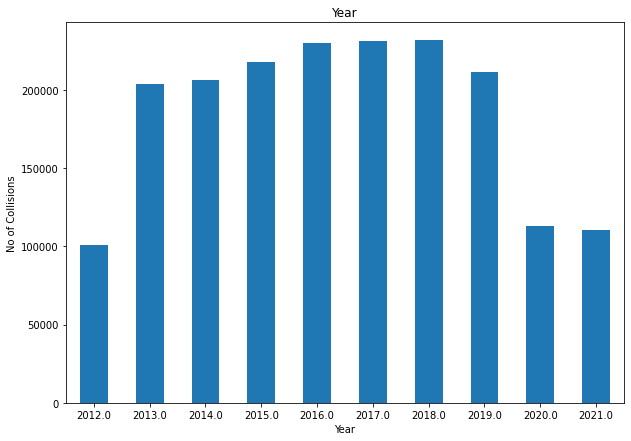

In [45]:
hist_udf(h_df,'Year')

**we can observe that 2018 is the year in which most of the accidents happen and then gradually they reduced in 2020-2021 because of the covid**

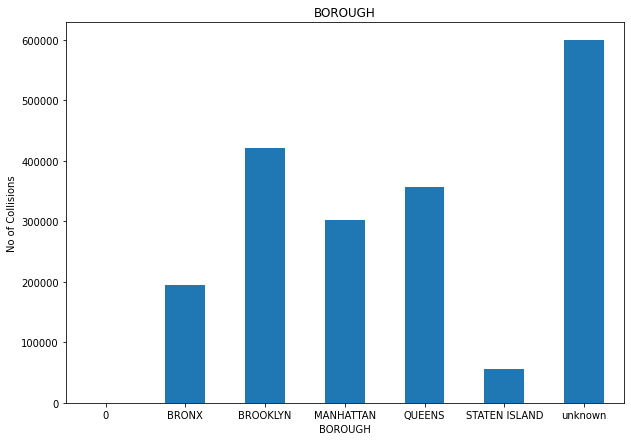

In [46]:
hist_udf(h_df, 'BOROUGH')

**From the above apart from unknown we can observe that Brooklyn is the borough where most of the accidents took place**

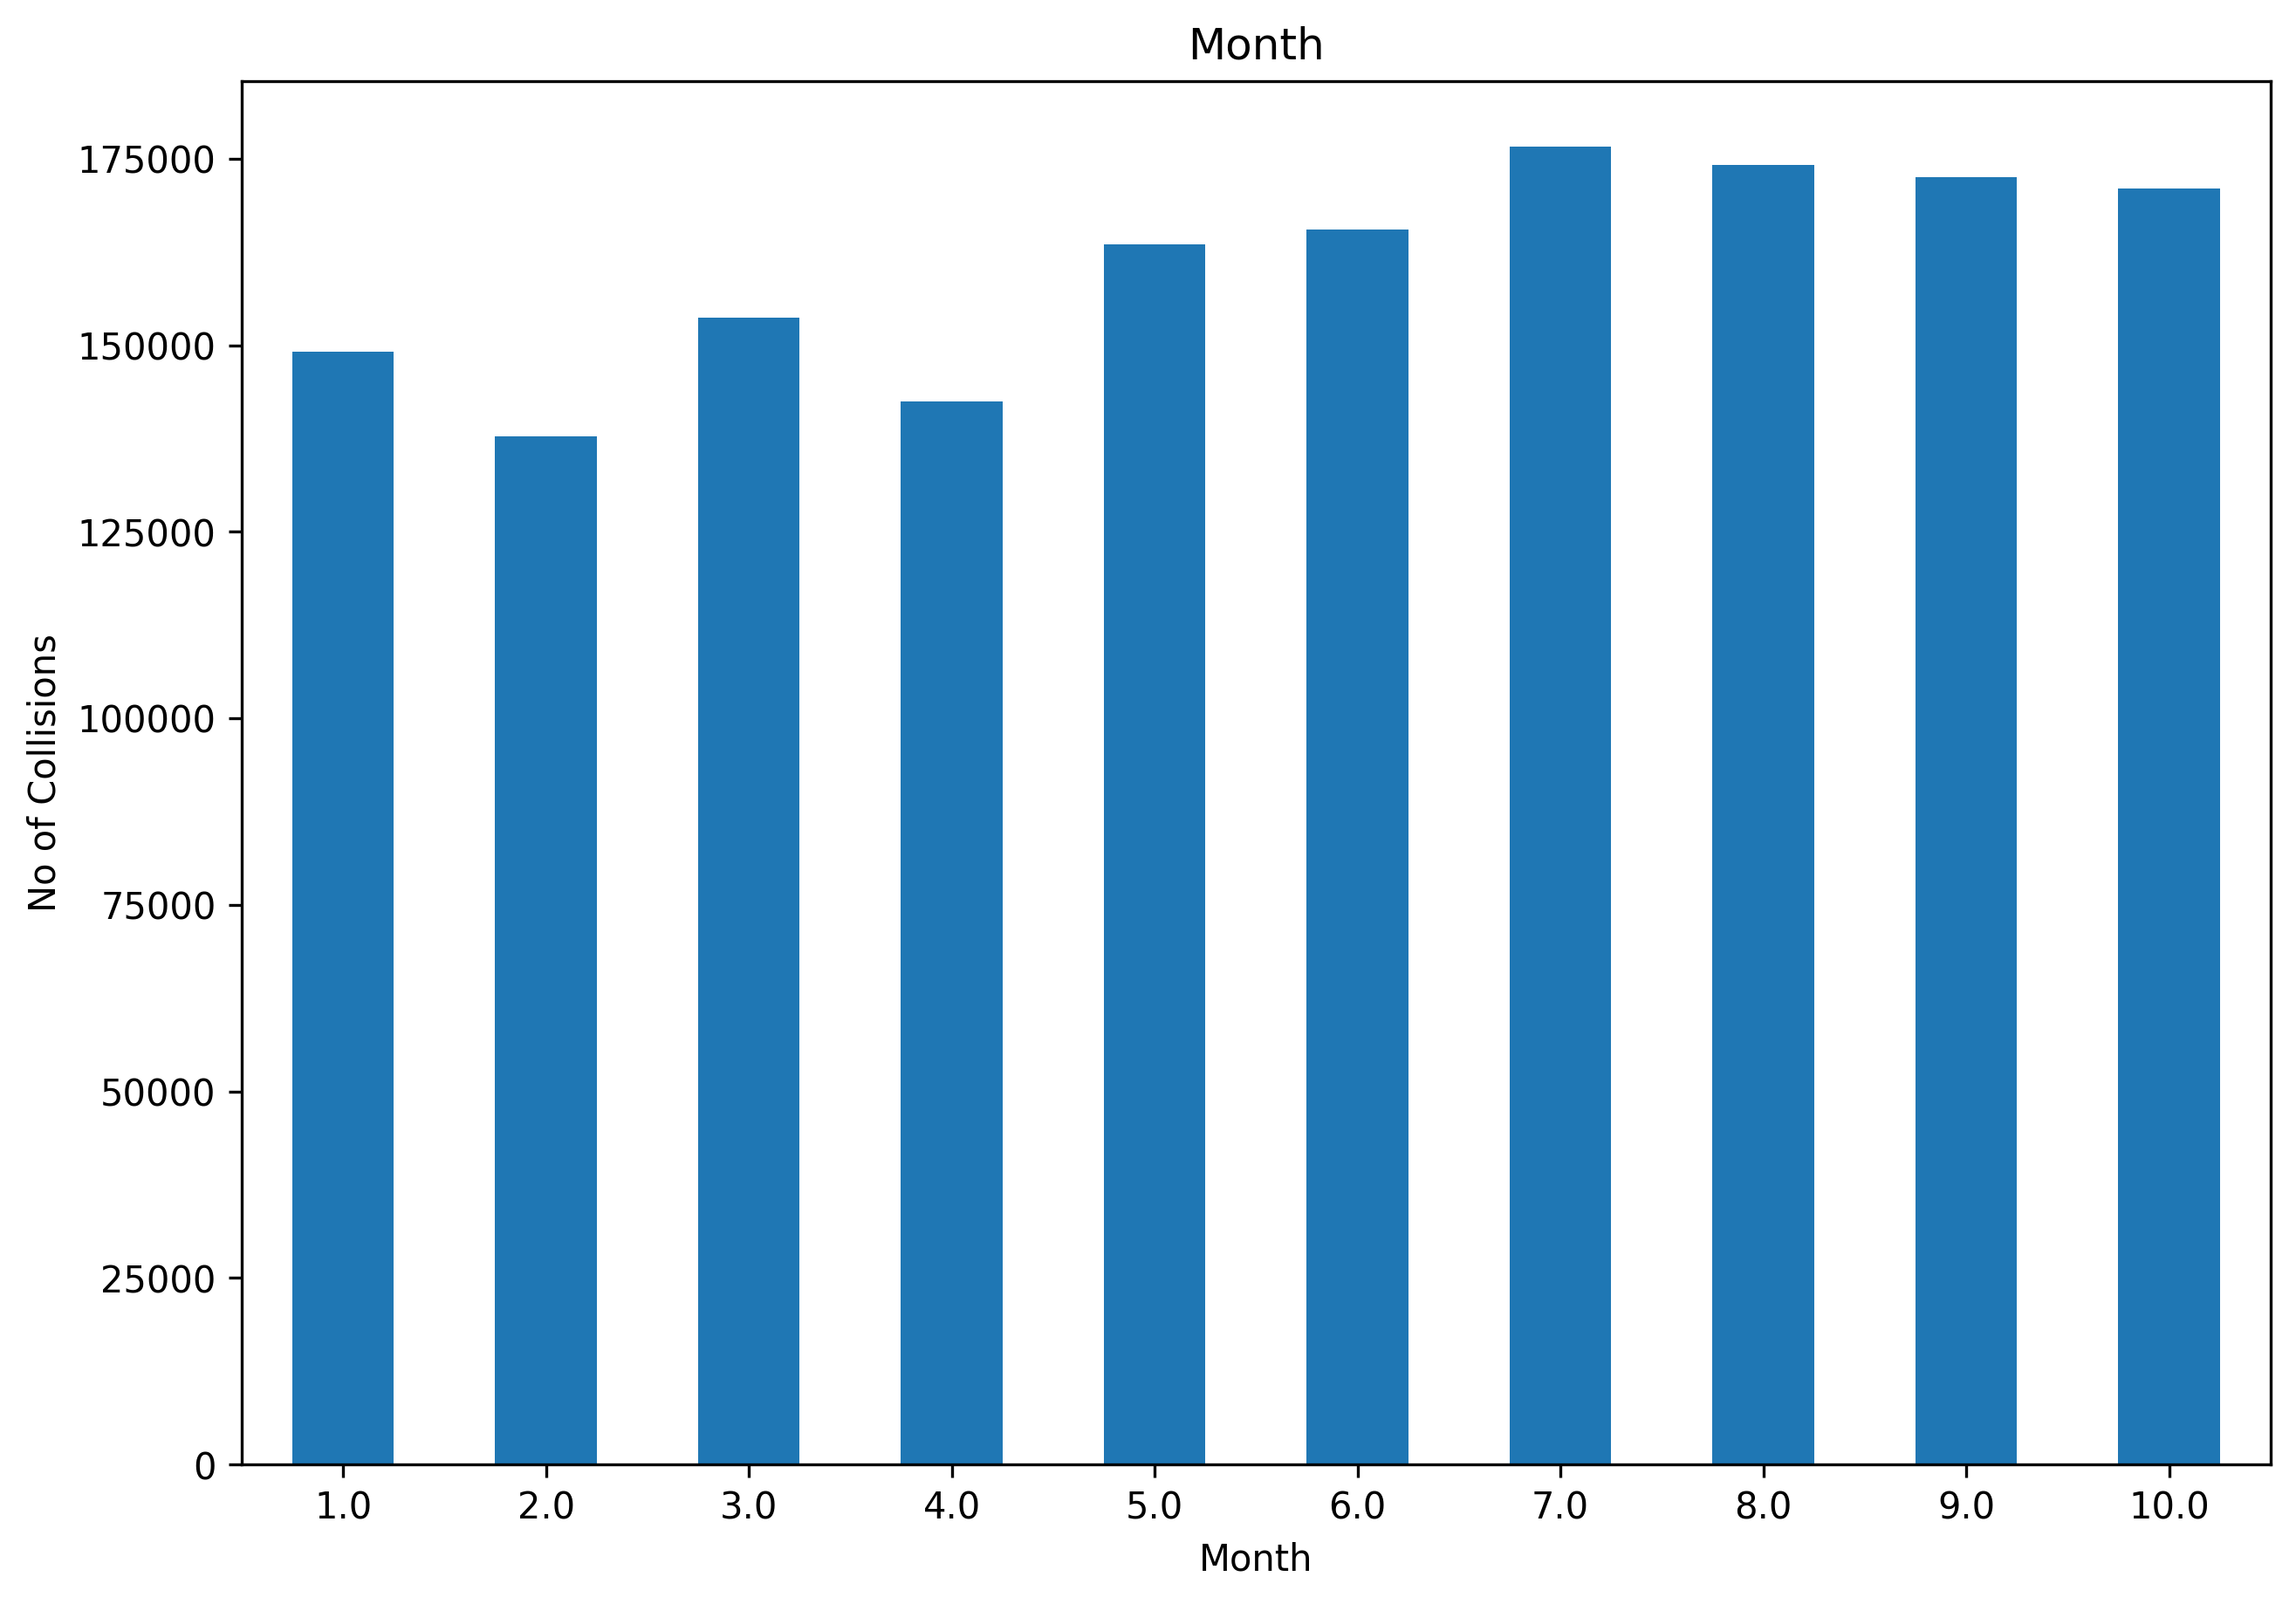

In [149]:
hist_udf(h_df,'Month')

**July is the month in which most of the accidents happened**

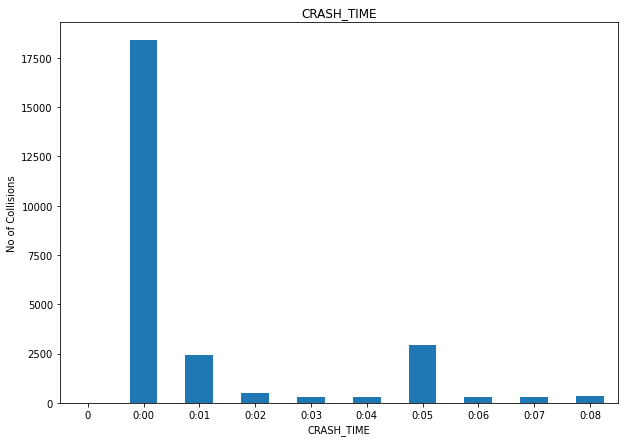

In [48]:
hist_udf(h_df, 'CRASH_TIME')

# Multivariate Analysis

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
collisions_df.groupBy("Year").agg(sum("NUMBER_OF_MOTORIST_KILLED").alias("NUMBER_OF_MOTORIST_KILLED")).show()

+----+-------------------------+
|Year|NUMBER_OF_MOTORIST_KILLED|
+----+-------------------------+
|2018|                       98|
|2015|                       95|
|2022|                       85|
|2013|                      110|
|null|                     null|
|2014|                      109|
|2019|                       82|
|2020|                      137|
|2012|                       59|
|2016|                       72|
|2017|                      107|
|2021|                      133|
+----+-------------------------+



In [118]:
def hist_udf_1(df,col1,col2):
    plt.rcParams["figure.figsize"] = (50,10)
    df.stratify([col1]).cols[col2].hist()
    plt.show()

In [124]:
h_df.stratify(['Year']).cols['Month'].value_counts()

Year  Month
2012  7        16992
      8        17142
      9        16535
      10       16864
      11       15889
               ...  
2022  7         8827
      8         8796
      9         7302
      10          98
      11          21
Name: value_counts, Length: 125, dtype: int64

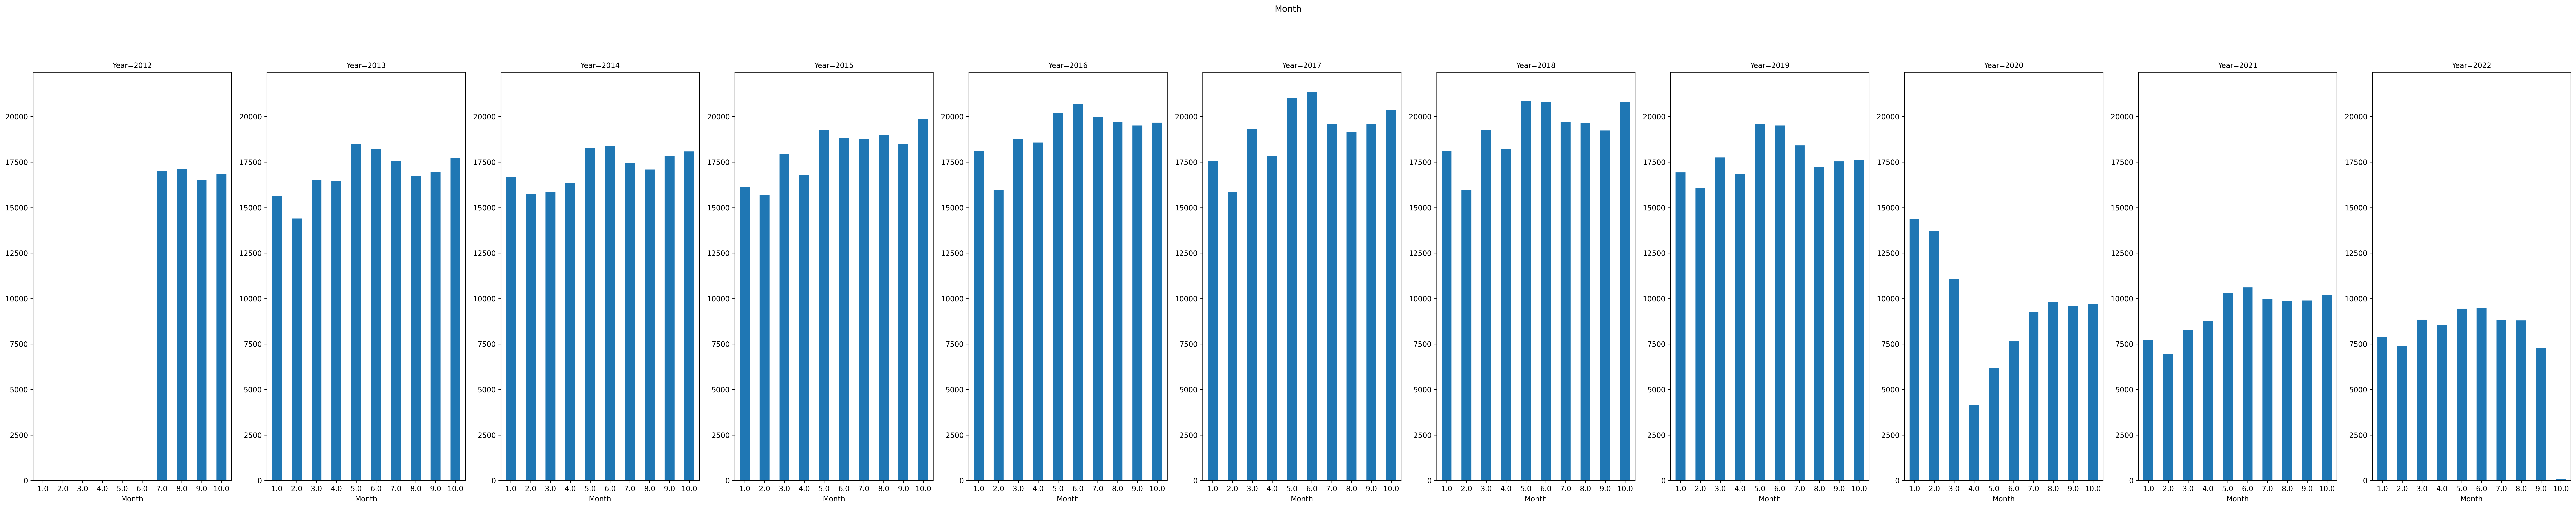

In [119]:
hist_udf_1(h_df,'Year','Month')

In [126]:
h_df.stratify(['Year']).cols['NUMBER_OF_MOTORIST_KILLED'].value_counts()

Year  NUMBER_OF_MOTORIST_KILLED
2012  0                            100492
      1                                50
      2                                 2
      5                                 1
2013  0                            203632
      1                                96
      2                                 4
      3                                 2
2014  0                            205934
      1                                91
      2                                 7
      4                                 1
2015  0                            217604
      1                                84
      2                                 4
      3                                 1
2016  0                            229768
      1                                57
      2                                 3
      3                                 3
2017  0                            230907
      1                                93
      2                                 7
20

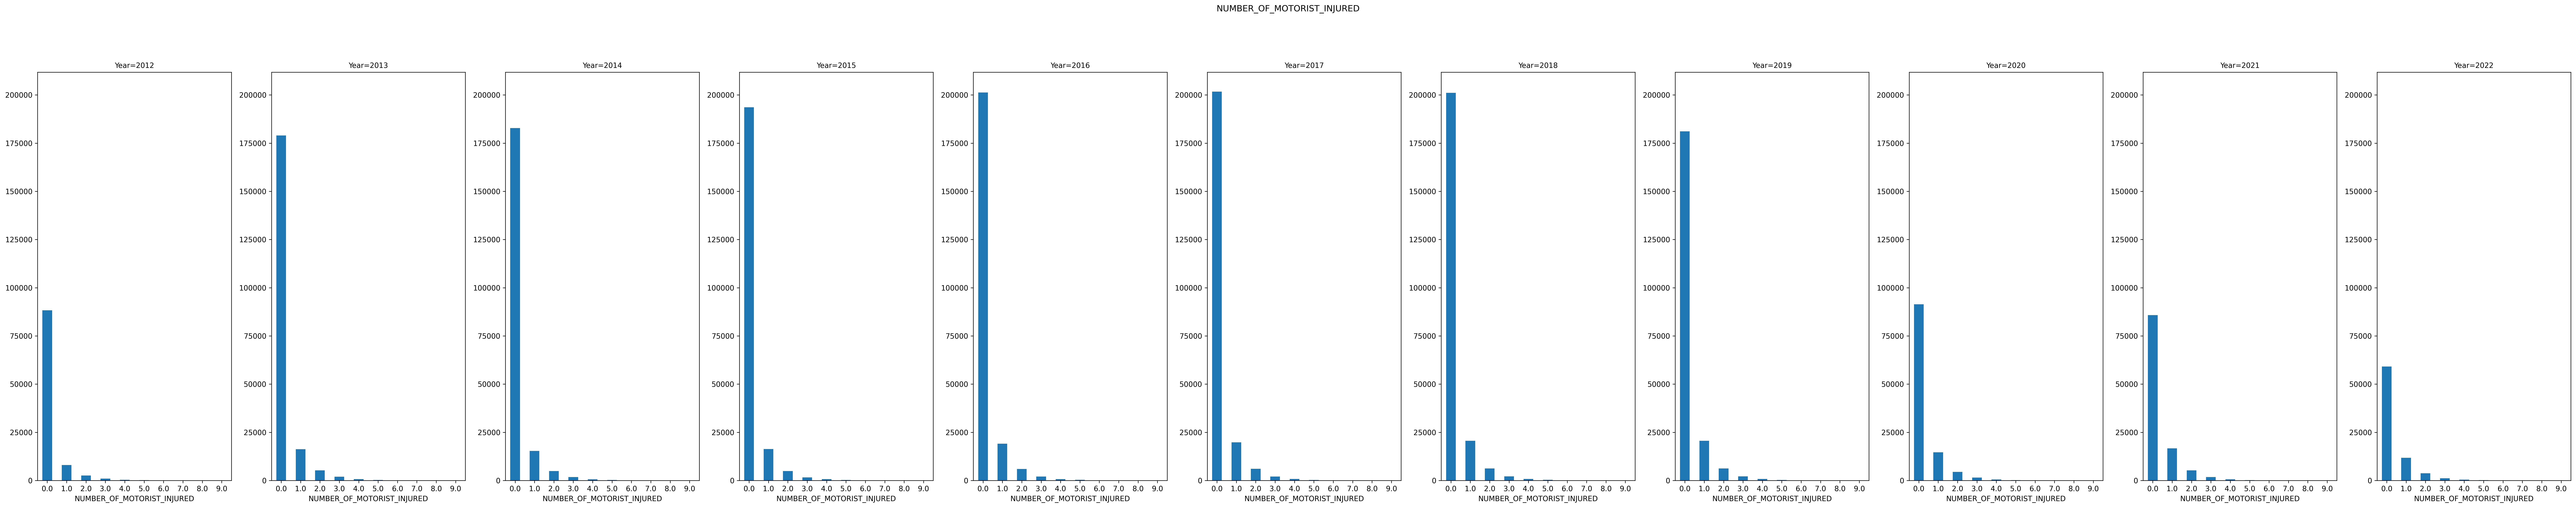

In [125]:
hist_udf_1(h_df,'Year','NUMBER_OF_MOTORIST_INJURED')

<AxesSubplot:title={'center':'CONTRIBUTING_FACTOR_VEHICLE_1'}, xlabel='CONTRIBUTING_FACTOR_VEHICLE_1'>

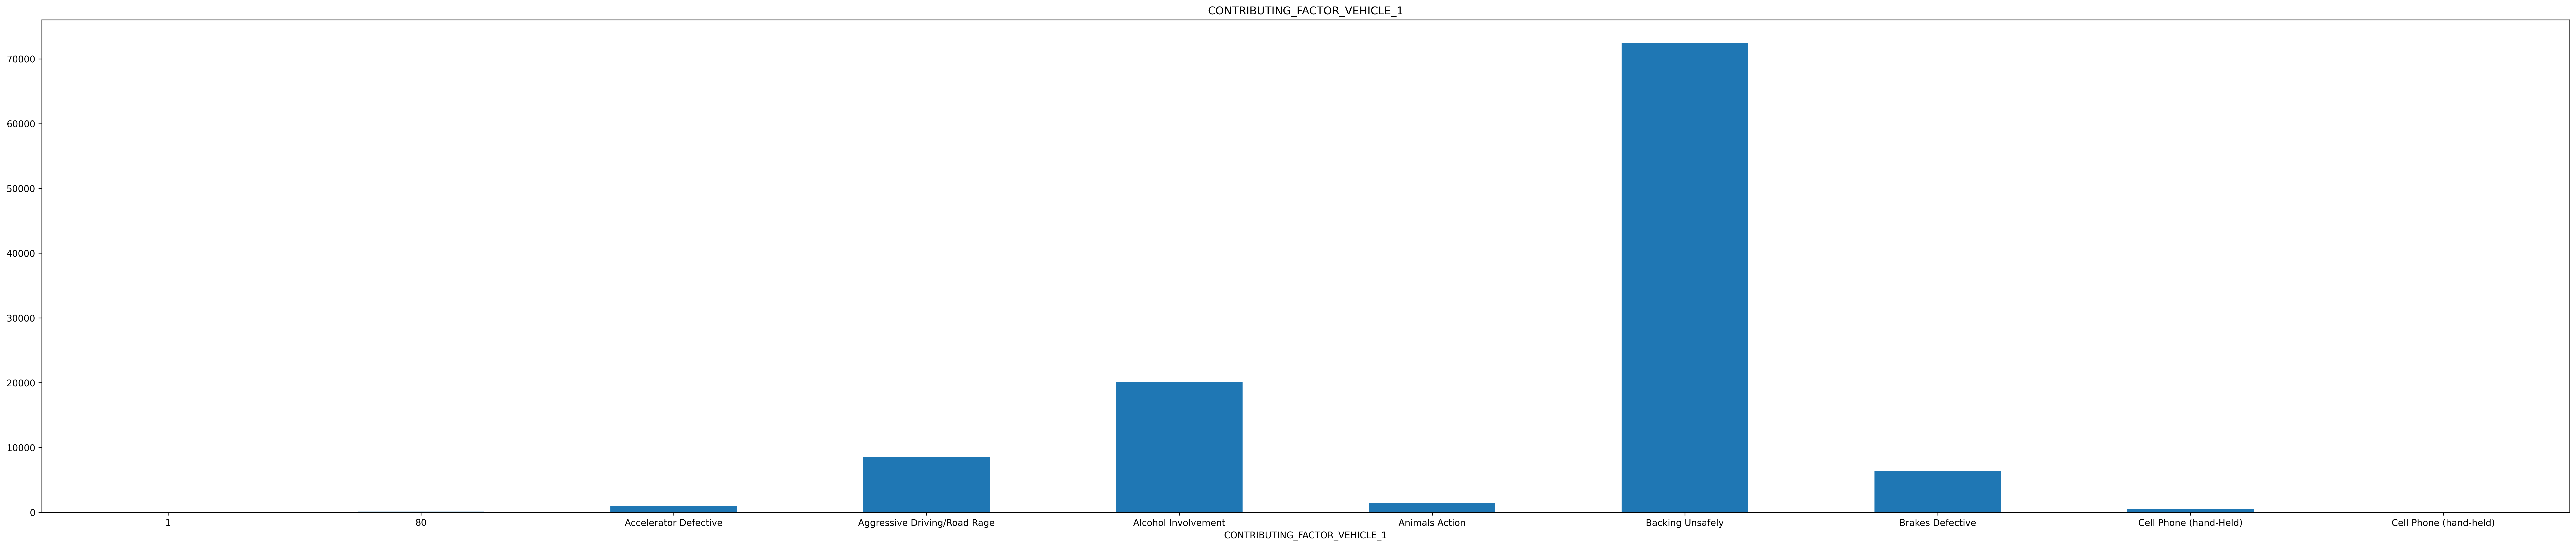

In [139]:
h_df.cols['CONTRIBUTING_FACTOR_VEHICLE_1'].hist()

**I observed that Backing unsafely is the main reason for most of the accidents**

(<Figure size 15000x3000 with 7 Axes>,
 [<AxesSubplot:title={'center':'BOROUGH=0'}, xlabel='Year'>,
  <AxesSubplot:title={'center':'BOROUGH=BRONX'}, xlabel='Year'>,
  <AxesSubplot:title={'center':'BOROUGH=BROOKLYN'}, xlabel='Year'>,
  <AxesSubplot:title={'center':'BOROUGH=MANHATTAN'}, xlabel='Year'>,
  <AxesSubplot:title={'center':'BOROUGH=QUEENS'}, xlabel='Year'>,
  <AxesSubplot:title={'center':'BOROUGH=STATEN ISLAND'}, xlabel='Year'>,
  <AxesSubplot:title={'center':'BOROUGH=unknown'}, xlabel='Year'>])

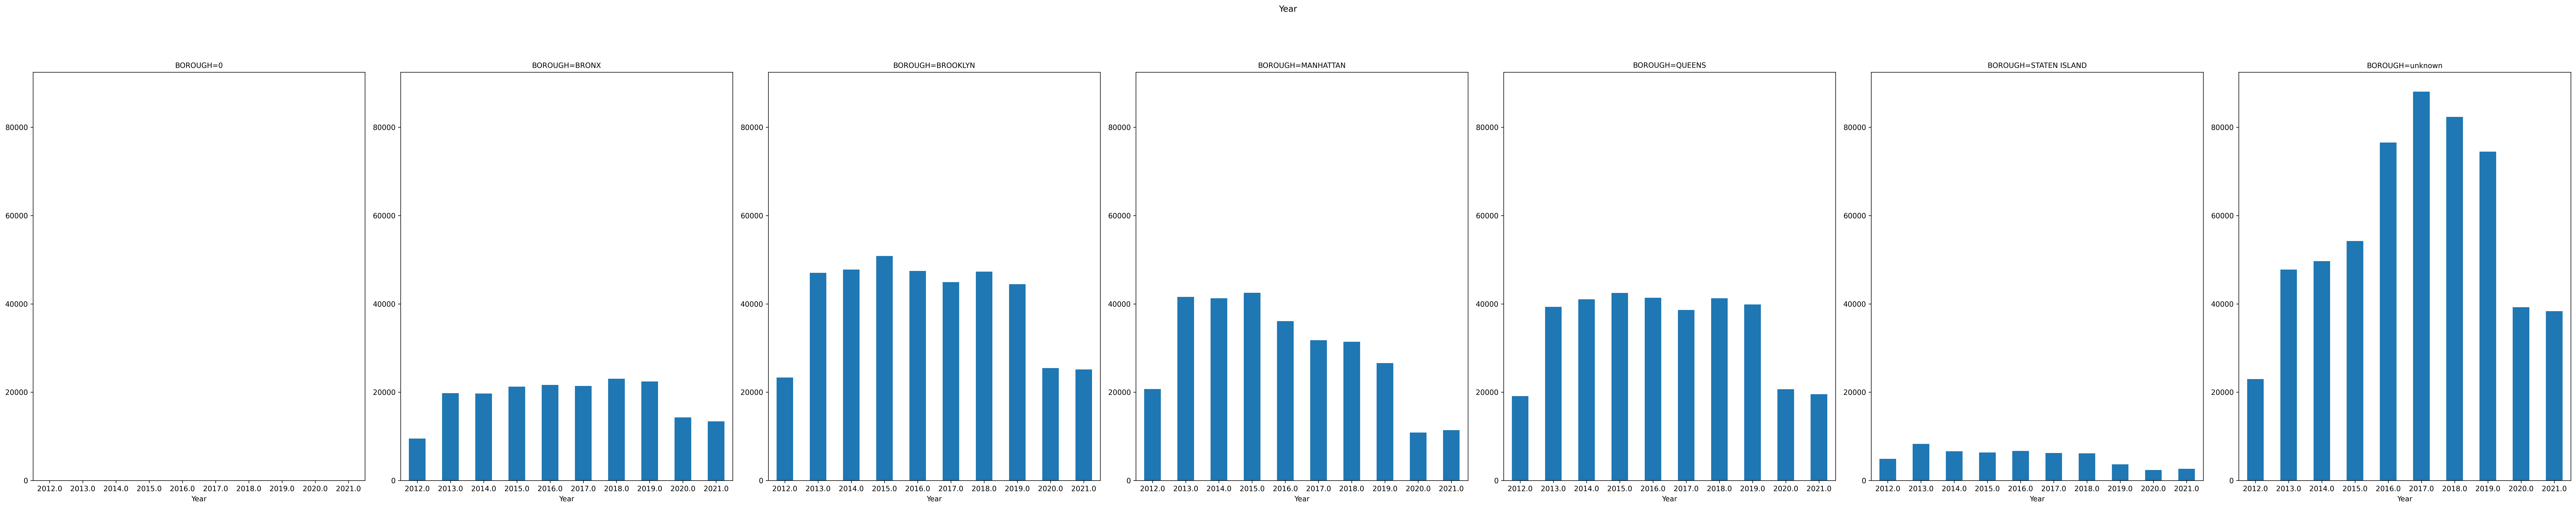

In [138]:
h_df.stratify(['BOROUGH']).cols['Year'].hist()